# pySpark


### Code cells

## Install Spark

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [92.1 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [3]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [4]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [5]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [6]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [0]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
spark

In [7]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2020-05-22 16:03:46--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [            <=>     ]   1.56G  3.34MB/s    in 8m 43s  

2020-05-22 16:12:29 (3.06 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1678916879]



In [8]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

In [31]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv("reported-crimes.csv", header = True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [12]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-warehouse
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [13]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-warehouse
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [14]:
rc.dtypes

[('ID', 'string'),
 ('Case Number', 'string'),
 ('Date', 'timestamp'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'string'),
 ('Domestic', 'string'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'string'),
 ('Y Coordinate', 'string'),
 ('Year', 'string'),
 ('Updated On', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('Location', 'string')]

In [15]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, IntegerType, DoubleType


In [0]:
labels = [('ID', StringType()),
 ('Case Number', StringType()),
 ('Date', TimestampType()),
 ('Block', StringType()),
 ('IUCR', StringType()),
 ('Primary Type', StringType()),
 ('Description', StringType()),
 ('Location Description', StringType()),
 ('Arrest', BooleanType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',StringType()),
 ('Updated On',TimestampType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location', StringType())]

In [0]:
schema = StructType([StructField(x[0], x[1], True) for x in labels])

In [19]:
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,BooleanType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,StringType,true),StructField(Updated On,TimestampType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [0]:
rc = spark.read.csv("reported-crimes.csv", schema= schema)

In [21]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: timestamp (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [22]:
rc.show(5)

+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        null|null|      null|    null|     null|    null|
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        

In [23]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|IUCR|
|1153|
|0281|
|0620|
|0810|
+----+
only showing top 5 rows



In [24]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|IUCR|
|1153|
|0281|
|0620|
|0810|
+----+
only showing top 5 rows



In [25]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|       null|null|  null|
|       null|null|  null|
|       null|null|  null|
|       null|null|  null|
+-----------+----+------+
only showing top 4 rows



In [26]:
from pyspark.sql.functions import lit
rc.withColumn('Ones', lit(1)).show(5)

+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+----+
|  ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|Ones|
+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+----+
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        null|null|      null|    null|     null|    null|   1|
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null| 

In [0]:
rc = rc.drop('IUCR')
rc.show(5)

+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        null|        

In [27]:
one_day = spark.read.csv("reported-crimes.csv", header = True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

3

In [32]:
rc.union(one_day).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [33]:
rc.union(one_day).orderBy('Date', ascending = False).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00|  003XX S WHIPPLE ST|0810|              THEFT|           OVER $500|              STREET|

In [0]:
rc.groupby('Primary Type').count().orderBy('count', ascending = False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418423|
|            BATTERY|1232221|
|    CRIMINAL DAMAGE| 771498|
|          NARCOTICS| 711647|
|      OTHER OFFENSE| 418836|
|            ASSAULT| 418507|
|           BURGLARY| 388028|
|MOTOR VEHICLE THEFT| 314141|
| DECEPTIVE PRACTICE| 265601|
|            ROBBERY| 255599|
+-------------------+-------+
only showing top 10 rows



In [0]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [0]:
Arrested = rc.filter(col('Arrest') == 'true').count()

In [0]:
Arrested

1874165

In [0]:
Total = rc.count()

In [0]:
Total

6752757

In [0]:
Percentage_Arrests = Arrested/Total * 100

In [0]:
Percentage_Arrests

27.754071411128816

In [0]:
rc.groupby('Location Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770576|
|           RESIDENCE|1144657|
|           APARTMENT| 698178|
+--------------------+-------+
only showing top 3 rows



In [0]:
from pyspark.sql import functions
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

In [0]:
from pyspark.sql import functions
from pyspark.sql.functions import lower, upper, substring


In [0]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [0]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [0]:
rc.select(lower(col('Primary type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 4)).show()

+--------------------+--------------------+-----------------------------+
| lower(Primary type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|  deceptive practice|  DECEPTIVE PRACTICE|                         DECE|
| crim sexual assault| CRIM SEXUAL ASSAULT|                         CRIM|
|            burglary|            BURGLARY|                         BURG|
|               theft|               THEFT|                         THEF|
| crim sexual assault| CRIM SEXUAL ASSAULT|                         CRIM|
| crim sexual assault| CRIM SEXUAL ASSAULT|                         CRIM|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|               theft|               THEFT|                         THEF|
|  deceptive practice|  DECEPTIVE PRACTICE|                         DECE|
|     criminal damage|     CRIMINAL DA

In [0]:
from pyspark.sql.functions import min, max

In [0]:
rc.select(min(col('Date')), max(col('Date'))).show(5)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



In [0]:
from pyspark.sql.functions import date_add, date_sub

In [0]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [0]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



In [0]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [0]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
df.show(5)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [0]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-25|                             2019-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



In [0]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [0]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:00|
+--------------------------------------------+-------------------------------------------------+



In [0]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])
df.show(1, truncate= False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [0]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show(1)

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2019-12-25|                                2019-12-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



In [34]:
nrc = spark.read.csv("reported-crimes.csv", header = True)
nrc.show(5, truncate = False)

+--------+-----------+----------------------+--------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|ID      |Case Number|Date                  |Block               |IUCR|Primary Type       |Description                        |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|
+--------+-----------+----------------------+--------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|11034701|JA366925   |01/01/2001 11:00:00 AM|016XX E 86TH PL     |1153|DECEPTIVE PRACTICE |FINANCIAL IDENTITY THEFT OVER $ 300|RES

In [35]:
!wget -O police-stations.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2020-05-22 16:39:47--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-stations.csv’

police-stations.csv     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-05-22 16:39:47 (314 MB/s) - ‘police-stations.csv’ saved [5699]



In [36]:
!ls

police-stations.csv  sample_data		spark-2.3.1-bin-hadoop2.7.tgz
reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	spark-warehouse


In [37]:
ps = spark.read.csv('police-stations.csv', header = True)
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.858

In [38]:
rc.cache()
rc.count()

6752796

In [40]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [41]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



In [0]:
from pyspark.sql.functions import lpad

In [43]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [45]:
ps.select(lpad(col('DISTRICT'), 3, '0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 001|
|                 006|
|                 011|
|                 016|
|                 024|
|                 002|
|                 007|
|                 025|
|                 010|
|                 015|
|                 003|
|                 019|
|                 014|
|                 008|
|                 004|
|                 020|
|                 018|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [0]:
ps = ps.withColumn('FormatDistrict', lpad(col('DISTRICT'), 3, '0'))

In [47]:
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+--------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|FormatDistrict|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+--------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|           Hea|
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-369

In [48]:
rc.join(ps, rc.District == ps.FormatDistrict, 'left_outer').show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|FormatDistrict|
+--------+-----------+--------------

In [50]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'FormatDistrict']

In [51]:
rc.join(ps, rc.District == ps.FormatDistrict, 'left_outer').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 ).show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|FormatDistrict|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+--------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|2001|08/05/2017 03:50:...|       4| South 

In [52]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [60]:
rc.select(col('Primary Type')).distinct().show(35, truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|ARSON                            |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|NON - CRIMINAL                   |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|RITUALISM                        |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE         

In [61]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show()

+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11249289|   JB176638|2016-12-23 12:00:00| 0000X N CENTRAL AVE|5093|  NON-CRIMINAL|       LOST PASSPORT|           RESIDENCE| false|   false|1513

In [66]:
nc.groupby(col('Description')).count().orderBy('count', ascending = False).show(truncate = False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [0]:
from pyspark.sql.functions import dayofweek

In [68]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [69]:
rc.show(2)

+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|   016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        n

In [70]:
rc.select(col('Date'), dayofweek(col('Date'))).show()

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2001-01-01 11:00:00|              2|
|2017-10-08 03:00:00|              1|
|2017-03-28 14:00:00|              3|
|2017-09-09 20:17:00|              7|
|2017-08-26 10:00:00|              7|
|2013-02-10 00:00:00|              1|
|2015-01-01 00:01:00|              5|
|2017-01-01 00:01:00|              1|
|2017-07-17 10:10:00|              2|
|2017-12-28 15:55:00|              5|
|2017-02-10 12:00:00|              6|
|2017-11-22 02:42:00|              4|
|2012-01-01 09:00:00|              1|
|2017-07-29 15:40:00|              7|
|2017-01-22 00:01:00|              1|
|2017-10-14 00:01:00|              7|
|2014-10-15 15:00:00|              4|
|2006-10-17 13:05:00|              3|
|2015-05-30 00:00:00|              7|
|2015-05-30 00:00:00|              7|
+-------------------+---------------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import date_format

In [73]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [74]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show()

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2017-10-08 03:00:00|              1|                 Sun|
|2017-03-28 14:00:00|              3|                 Tue|
|2017-09-09 20:17:00|              7|                 Sat|
|2017-08-26 10:00:00|              7|                 Sat|
|2013-02-10 00:00:00|              1|                 Sun|
|2015-01-01 00:01:00|              5|                 Thu|
|2017-01-01 00:01:00|              1|                 Sun|
|2017-07-17 10:10:00|              2|                 Mon|
|2017-12-28 15:55:00|              5|                 Thu|
|2017-02-10 12:00:00|              6|                 Fri|
|2017-11-22 02:42:00|              4|                 Wed|
|2012-01-01 09:00:00|              1|                 Sun|
|2017-07-29 15:40:00|              7|                 Sa

In [76]:
rc.groupby(date_format(col('Date'), 'E')).count(). orderBy('count', ascending = False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1016894|
|                 Wed| 973815|
|                 Tue| 967976|
|                 Sat| 965109|
|                 Thu| 964469|
|                 Mon| 952654|
|                 Sun| 911879|
+--------------------+-------+



In [77]:
rc.groupby(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911879),
 Row(date_format(Date, E)='Mon', count=952654),
 Row(date_format(Date, E)='Thu', count=964469),
 Row(date_format(Date, E)='Sat', count=965109),
 Row(date_format(Date, E)='Wed', count=973815),
 Row(date_format(Date, E)='Tue', count=967976),
 Row(date_format(Date, E)='Fri', count=1016894)]

In [78]:
dow = [x[0] for x in rc.groupby(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [0]:
cnt = [x[1] for x in rc.groupby(date_format(col('Date'), 'E')).count().collect()]

In [80]:
cnt

[911879, 952654, 964469, 965109, 973815, 967976, 1016894]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
cp = pd.DataFrame({'Day of week': dow, 'Count': cnt})

In [83]:
cp

,Day of week,Count
0,Sun,911879
1,Mon,952654
2,Thu,964469
3,Sat,965109
4,Wed,973815
5,Tue,967976
6,Fri,1016894


Text(0.5, 1.0, 'Number of reported crimes per day of the week from 2001 to present')

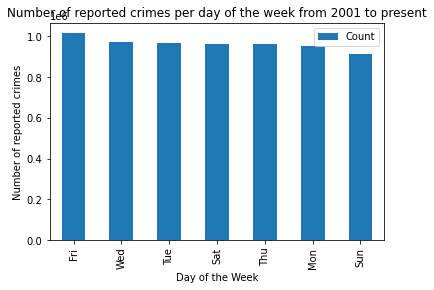

In [89]:
cp.sort_values('Count', ascending= False).plot(kind = 'bar', x = 'Day of week', y = 'Count')
plt.xlabel("Day of the Week")
plt.ylabel("Number of reported crimes")
plt.title("Number of reported crimes per day of the week from 2001 to present")

In [0]:
#RDD

In [92]:
psrdd = sc.textFile('police-stations.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [0]:
ps_header = psrdd.first()

In [94]:
ps_rest = psrdd.filter(lambda line:line!=ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [96]:
ps_rest.map(lambda line: line.split(',')).collect()

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['1',
  'Central',
  '1718 S State St',
  'Chicago',
  'IL',
  '60616',
  'http://home.chicagopolice.org/community/districts/1st-district-central/',
  '312-745-4290',
  '312-745-3694',
  '312-745-3693',
  '1176569.052',
  '1891771.704',
  '41.85837259',
  '-87.62735617',
  '"(41.8583725929',
  ' -87.627356171)"'],
 ['6',
  'Gresham',
  '7808 S Halsted St',
  'Chicago',
  'IL',
  '60620',
  'http://home.chicagopolice.org/community/districts/6th-district-gresham/',
  '312-745-3617',
  '312-745-3649',
  '312-745-3639',
  '1172283.013',
  '1853022.646',
  '41.75213684',
  '-87.64422891',
  '"(41.7521368378',
  ' -87.6442289066)"'],
 ['11',
  'Harrison',
  '3151 W Harrison St',
  'Chicago',
  'IL',
  '60612',
  'http://home.chicagopol

In [97]:
ps_rest.map(lambda line: line.split(',')).count()

24

In [102]:
(ps_rest.filter(lambda line:line.split(",")[0] == '7').map(lambda line: (line.split(",")[0], line.split(",")[1], line.split(",")[2], line.split(",")[5])).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

In [103]:
(ps_rest.filter(lambda line:line.split(",")[0] in ['10', '11']).map(lambda line: (line.split(",")[0], line.split(",")[1], line.split(",")[2], line.split(",")[5])).collect())

[('11', 'Harrison', '3151 W Harrison St', '60612'),
 ('10', 'Ogden', '3315 W Ogden Ave', '60623')]